In [4]:
import os

base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
    model = tf.keras.models.Sequential([
        # 4 layers of convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(learning_rate=1e-4),
                  metrics='accuracy')

    return model

In [3]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
EPOCHS=20

model = create_model()

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/20
100/100 - 76s - loss: 0.6848 - accuracy: 0.5475 - val_loss: 0.6687 - val_accuracy: 0.5570 - 76s/epoch - 758ms/step
Epoch 2/20
100/100 - 54s - loss: 0.6527 - accuracy: 0.6130 - val_loss: 0.6320 - val_accuracy: 0.6200 - 54s/epoch - 543ms/step
Epoch 3/20
100/100 - 50s - loss: 0.6018 - accuracy: 0.6685 - val_loss: 0.5937 - val_accuracy: 0.6780 - 50s/epoch - 504ms/step
Epoch 4/20
100/100 - 51s - loss: 0.5577 - accuracy: 0.7070 - val_loss: 0.5884 - val_accuracy: 0.6820 - 51s/epoch - 507ms/step
Epoch 5/20
100/100 - 51s - loss: 0.5301 - accuracy: 0.7285 - val_loss: 0.5766 - val_accuracy: 0.6820 - 51s/epoch - 512ms/step
Epoch 6/20
100/100 - 50s - loss: 0.5047 - accuracy: 0.7465 - val_loss: 0.5956 - val_accuracy: 0.6740 - 50s/epoch - 501ms/step
Epoch 7/20
100/100 - 51s - loss: 0.4867 - accuracy: 0.7600 - val_loss: 0.5651 - val_accuracy: 0.7030 - 51s/epoch - 506ms/step
Epoch 8/20
100/100 - 50s - loss: 0.4601 - accuracy: 0.7780 - val_loss: 0.5744 - val_accuracy: 0.7040 - 50s/epoch - 501

In [18]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuraccy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.show()

20
20


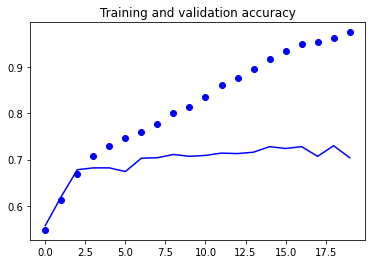

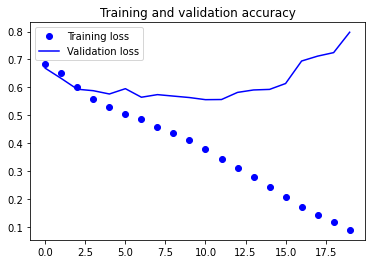

In [16]:
plot_loss_acc(history)

### Data augumentation
One simple method to avoid overfitting is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too.

What if you tweak with the images a bit -- rotate the image, squash it, etc. That's what image augementation is all about. And there's an API that makes it easy!

Take a look at the ImageDataGenerator which you have been using to rescale the image. There are other properties on it that you can use to augment the image.
```# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```  

These are just a few of the options available. Let's quickly go over it:

- rotation_range is a value in degrees (0–180) within which to randomly rotate pictures.
- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
- shear_range is for randomly applying shearing transformations.
- zoom_range is for randomly zooming inside pictures.
- horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
- fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.
Run the next cells to see the impact on the results. The code is similar to the baseline but the definition of train_datagen has been updated to use the parameters described above.

In [13]:
mode_for_aug = create_model()

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

#train with new model
history_with_aug = mode_for_aug.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 57s - loss: 0.6907 - accuracy: 0.5200 - val_loss: 0.6677 - val_accuracy: 0.6070 - 57s/epoch - 571ms/step
Epoch 2/20
100/100 - 56s - loss: 0.6689 - accuracy: 0.5795 - val_loss: 0.6673 - val_accuracy: 0.5480 - 56s/epoch - 565ms/step
Epoch 3/20
100/100 - 53s - loss: 0.6558 - accuracy: 0.5825 - val_loss: 0.6351 - val_accuracy: 0.6310 - 53s/epoch - 525ms/step
Epoch 4/20
100/100 - 50s - loss: 0.6448 - accuracy: 0.6195 - val_loss: 0.6083 - val_accuracy: 0.6650 - 50s/epoch - 503ms/step
Epoch 5/20
100/100 - 50s - loss: 0.6303 - accuracy: 0.6380 - val_loss: 0.5998 - val_accuracy: 0.6670 - 50s/epoch - 500ms/step
Epoch 6/20
100/100 - 50s - loss: 0.6195 - accuracy: 0.6495 - val_loss: 0.5814 - val_accuracy: 0.6980 - 50s/epoch - 502ms/step
Epoch 7/20
100/100 - 50s - loss: 0.5977 - accuracy: 0.6760 - val_loss: 0.5817 - val_accuracy: 0.6880 - 50s/epoch - 497ms/step
Epoch 8/20
100/100 - 50s - loss: 0

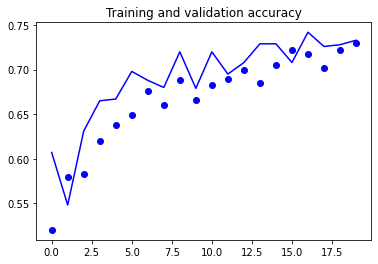

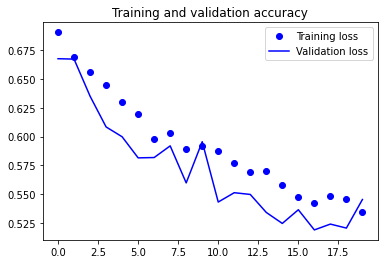

In [14]:

plot_loss_acc(history_with_aug)